### 1. Plot a bar chart showing count of individual species?

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Fish_dataset.csv")

In [5]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
s = df['Species'].value_counts()
s

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:title={'center':'Number for each Species'}>

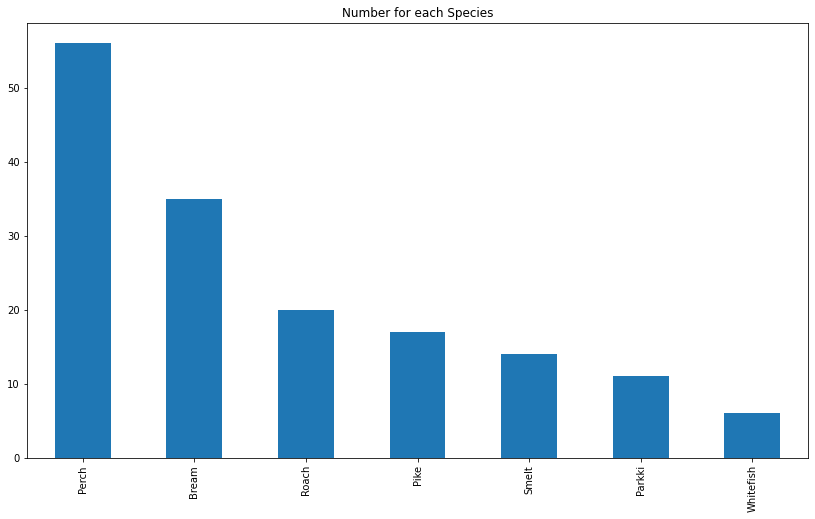

In [8]:
df['Species'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Species")

### 2. Identify outliers and remove if any?

In [9]:
import seaborn as sns

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1'>

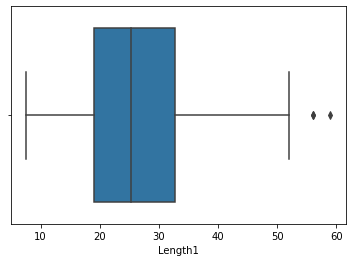

In [10]:
sns.boxplot(df.Length1)

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2'>

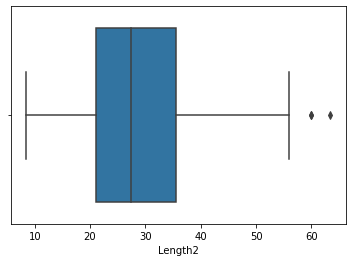

In [11]:
sns.boxplot(df.Length2)

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3'>

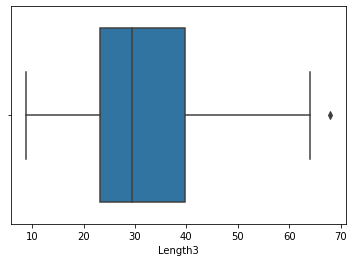

In [12]:
sns.boxplot(df.Length3)

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

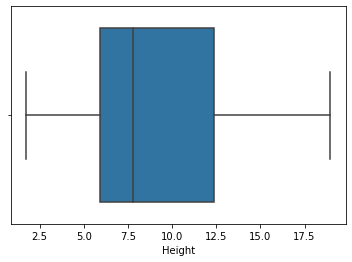

In [13]:
sns.boxplot(df.Height)

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width'>

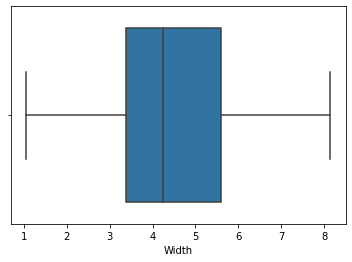

In [14]:
sns.boxplot(df.Width)

In [18]:
# Handling Outliers | I am capping that with Var > P95 then Var = P95 [Upper CAP]
#                                         Var < P05 then Var = P05 [Lower CAP]
#_________________________________________________________________________________
df['Length1'] = df['Length1'].clip(upper=df['Length1'].quantile(0.95)) 
df['Length1']= df['Length1'].clip(lower=df['Length1'].quantile(0.05))

df['Length2'] = df['Length2'].clip(upper=df['Length2'].quantile(0.95)) 
df['Length2']= df['Length2'].clip(lower=df['Length2'].quantile(0.05))

df['Length3'] = df['Length3'].clip(upper=df['Length3'].quantile(0.95)) 
df['Length3']= df['Length3'].clip(lower=df['Length3'].quantile(0.05))

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length1', ylabel='Density'>

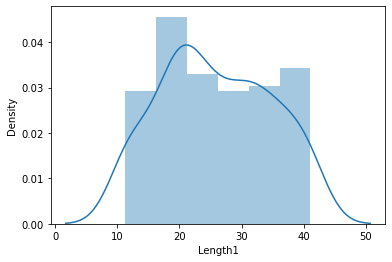

In [19]:
#Checking Normality
sns.distplot(df.Length1)

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length2', ylabel='Density'>

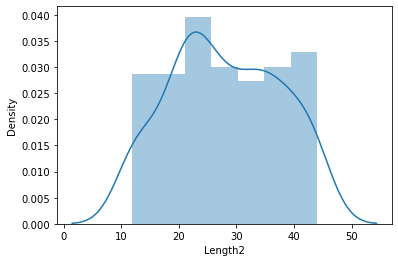

In [20]:
sns.distplot(df.Length2) #Checking Normality

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length3', ylabel='Density'>

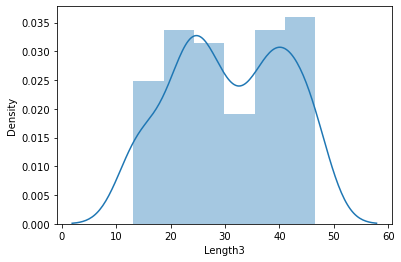

In [21]:
sns.distplot(df.Length3) #Checking Normality

### 3. Build a regression model and print regression equation?

# MULTIPLE LINEAR REGRESSION MODEL

In [102]:
import statsmodels.formula.api as smf

In [97]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])

In [98]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [99]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [100]:
from sklearn import metrics

In [107]:
lm = smf.ols( 'Weight ~ Species + Height + Width + Length1 + Length2 + Length3', df ).fit()

In [108]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     139.4
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           3.49e-59
Time:                        11:55:28   Log-Likelihood:                -1011.3
No. Observations:                 159   AIC:                             2037.
Df Residuals:                     152   BIC:                             2058.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -603.6072     56.947    -10.599      0.000    -716.117    -491.097
Species       30.8994     10.888      2.838      0.005       9.388      52.411
Height        52.6593     12.521      4.206      0.000      27.922      77.397
Width         34.6855     26.251      1.321      0.188     -17.179      86.550
Length1      129.7379     47.912      2.708      0.008      35.078     224.398
Length2      -44.6750     51.079     -0.875      0.383    -145.591      56.241
Length3      -58.4435     21.601     -2.706      0.008    -101.120     -15.767
==============================================================================
Omnibus:                      109.067   Durbin-Watson:                   0.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              894.432
Skew:                           2.446   Prob(JB):                    5.98e-195
Kurtosis:                      13.539   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
lm = smf.ols( 'Weight ~ Species + Height + Length1 + Length3', df ).fit()

In [122]:
lm.summary()
#after removing length2 and width we can see that the f-statistic has been increased and thereby increasing the accuracy of model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     208.8
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           4.21e-61
Time:                        12:03:32   Log-Likelihood:                -1012.2
No. Observations:                 159   AIC:                             2034.
Df Residuals:                     154   BIC:                             2050.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.9573     53.294    -11.745      0.000    -731.239    -520.675
Species       37.1238      9.831      3.776      0.000      17.703      56.545
Height        64.5451      8.382      7.700      0.000      47.986      81.105
Length1      107.7055     16.041      6.714      0.000      76.017     139.394
Length3      -78.7860     15.662     -5.030      0.000    -109.726     -47.846
==============================================================================
Omnibus:                      106.515   Durbin-Watson:                   0.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              854.339
Skew:                           2.377   Prob(JB):                    3.04e-186
Kurtosis:                      13.313   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
lm.params

Intercept   -603.607199
Species       30.899427
Height        52.659331
Width         34.685535
Length1      129.737906
Length2      -44.674981
Length3      -58.443501
dtype: float64

In [110]:
lm.pvalues

Intercept    5.333566e-20
Species      5.161984e-03
Height       4.430369e-05
Width        1.883928e-01
Length1      7.548843e-03
Length2      3.831552e-01
Length3      7.596562e-03
dtype: float64

In [111]:
#removing width and length2 as they very high pvalue as compared to others
lm = smf.ols( 'Weight ~ Species + Height + Length1 + Length3', df ).fit()

In [112]:
lm.params

Intercept   -625.957255
Species       37.123793
Height        64.545072
Length1      107.705544
Length3      -78.785956
dtype: float64

In [113]:
lm.pvalues

Intercept    3.777990e-23
Species      2.269032e-04
Height       1.537880e-12
Length1      3.421408e-10
Length3      1.347351e-06
dtype: float64

In [114]:
#lmpredict is the the predicted weight
lmpredict = lm.predict( {'Species': df.Species, 'Height':df.Height, 'Length1': df.Length1, 'Length3':df.Length3 } )

In [116]:
#taking mean square error of orginal and predicted weight
mse = metrics.mean_squared_error( df.Weight, lmpredict )
rmse = np.sqrt( mse )
rmse

140.80518897032348

In [117]:
#taking mean absolute error of orginal and predicted weight
metrics.mean_absolute_error(df.Weight, lmpredict)

93.40115954518554

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

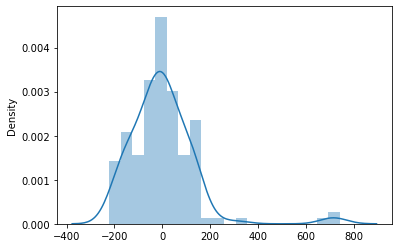

In [118]:
#plot of the residuals
sns.distplot(lm.resid)

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


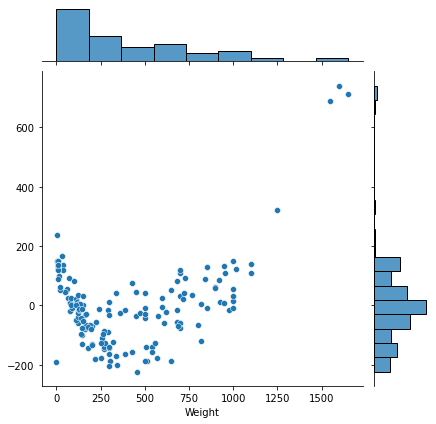

In [119]:
#plot of residual vs original weight
sns.jointplot(df.Weight, lm.resid)

# USING SKLEARN LIB TO BUILD MODEL

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
# Splitting into Train and test data sets
# Typically the model should be built on a training dataset and validated against a test dataset
# Let's split the dataset into 70/30 ratio. 70% belongs to training and 30% belongs to test.

from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
  df[["Species", "Height", "Width", "Length1", "Length2", "Length3"]],
  df.Weight,
  test_size=0.3,
  random_state = 101 )

In [126]:
print (X_train)
print (X_test)

     Species   Height   Width  Length1  Length2  Length3
65         1   8.8928  3.2928     18.4     20.0     22.4
100        2   6.5610  4.2390     23.5     25.6     27.0
67         1   9.3960  3.4104     19.0     20.7     23.2
21         0  15.9936  5.3704     31.4     34.0     39.2
22         0  15.5227  5.2801     31.5     34.5     39.7
..       ...      ...     ...      ...      ...      ...
63         1   7.4052  2.6730     16.3     17.7     19.8
70         1  11.0880  4.1440     23.0     25.0     28.0
81         2   5.0820  2.7720     18.2     20.0     21.0
11         0  14.3714  4.8146     28.7     31.0     36.2
95         2   6.2750  3.7250     21.5     23.5     25.0

[111 rows x 6 columns]
     Species   Height   Width  Length1  Length2  Length3
127        2  12.4888  7.5958  41.1000    44.00   46.600
42         4   6.1146  3.2943  19.4000    21.00   23.700
55         6   8.3804  4.2476  23.6000    26.00   28.700
101        2   7.1680  4.1440  25.0000    26.50   28.000
33     

In [127]:
## Building the model with train set and make predictions on test set
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict( X_test )

In [128]:
linreg.coef_

array([ 22.72978633,  44.3314795 ,  67.83815453, 148.96962173,
       -85.01026065, -42.01732156])

In [129]:
#Calculating root mean square error on testing data
from sklearn import metrics
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )
rmse

181.4799973805688

In [130]:
#Calculating root mean square error on training error
y_pred_t = linreg.predict(X_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
rmse_t

120.78485452797938

In [131]:
#Calculating root mean square on training data
metrics.r2_score( y_train, y_pred_t )

0.8731706945341993

In [132]:
#Calculating root mean square on testing data
metrics.r2_score( y_test, y_pred )

0.7874585095844924

In [133]:
list( zip( ["Species", "Height", "Width", "Length1", "Length2", "Length3"], list( linreg.coef_ ) ) )

[('Species', 22.72978633225896),
 ('Height', 44.33147950317762),
 ('Width', 67.83815452536058),
 ('Length1', 148.96962172975051),
 ('Length2', -85.01026065403367),
 ('Length3', -42.017321562819674)]

In [134]:
#calculating residuals or error between testing and predicted data
residuals = y_test - y_pred

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


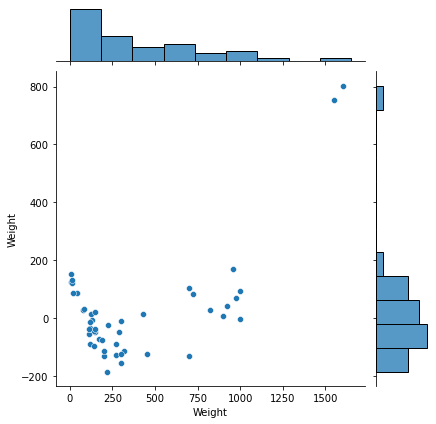

In [135]:
#plot of original weight and residual data
sns.jointplot(df.Weight, residuals)

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

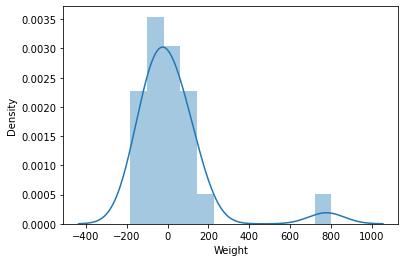

In [136]:
#plot of residuals
sns.distplot( residuals )

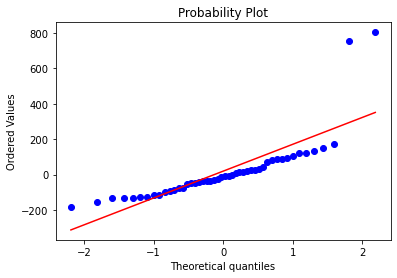

In [137]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

### 4. What is the mean score of the model at  95% confidence interval?

In [140]:
#Taking only 95% confidence interval
df = df.clip(upper=df.quantile(0.95), axis=1) 
df = df.clip(lower=df.quantile(0.05), axis=1)



In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
  df[["Species", "Height", "Width", "Length1", "Length2", "Length3"]],
  df.Weight,
  test_size=0.3,
  random_state = 101 )

In [143]:
print (X_train)
print (X_test)

     Species   Height   Width  Length1  Length2  Length3
65         1   8.8928  3.2928     18.4     20.0     22.4
100        2   6.5610  4.2390     23.5     25.6     27.0
67         1   9.3960  3.4104     19.0     20.7     23.2
21         0  15.9936  5.3704     31.4     34.0     39.2
22         0  15.5227  5.2801     31.5     34.5     39.7
..       ...      ...     ...      ...      ...      ...
63         1   7.4052  2.6730     16.3     17.7     19.8
70         1  11.0880  4.1440     23.0     25.0     28.0
81         2   5.0820  2.7720     18.2     20.0     21.0
11         0  14.3714  4.8146     28.7     31.0     36.2
95         2   6.2750  3.7250     21.5     23.5     25.0

[111 rows x 6 columns]
     Species    Height    Width   Length1  Length2  Length3
127        2  12.48880  7.28462  41.10000   44.000  46.6000
42         4   6.11460  3.29430  19.40000   21.000  23.7000
55         5   8.38040  4.24760  23.60000   26.000  28.7000
101        2   7.16800  4.14400  25.00000   26.500  

In [144]:
## Building the model with train set and make predictions on test set
linreg = LinearRegression()
linreg.fit( X_train, y_train )
y_pred = linreg.predict( X_test )

In [145]:
linreg.coef_

array([ 26.76233616,  45.07685466,  53.97967808,  92.98170944,
       -38.96013037, -35.47339756])

In [146]:
#Calculating root mean square error on testing data
from sklearn import metrics
rmse = np.sqrt( metrics.mean_squared_error( y_test, y_pred ) )
rmse

102.02354977610128

In [147]:
#Calculating root mean square error on training error
y_pred_t = linreg.predict(X_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_t) )
rmse_t

93.8708490666008

In [148]:
#Calculating root mean square on training data
metrics.r2_score( y_train, y_pred_t )

0.9104133336354534

In [149]:
#Calculating root mean square on testing data
metrics.r2_score( y_test, y_pred )

0.9058307095747817

### 5. Compare real and predicted weights and give a conclusion statement based on it?

In [150]:
#calculating residuals or error between testing and predicted data
residuals = y_test - y_pred

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


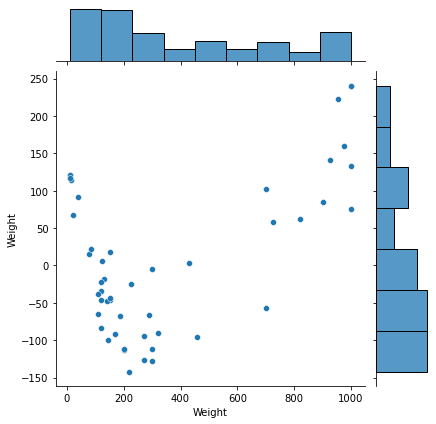

In [151]:
#plot of original weight and residual data
sns.jointplot(df.Weight, residuals)

Here in the above graoh we can see the error/residual between the predicted and the original weight. When the 95% confidence interval is taken we observe that the our predicted model is giving 90% accuracy. 

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

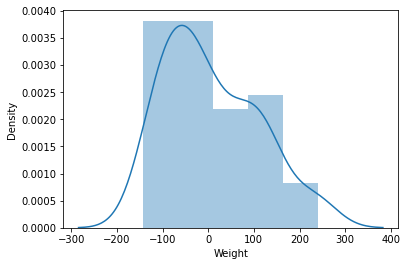

In [154]:
#plot of residuals
sns.distplot( residuals )

We can observe that the error between the original and the predicted weight mostly lies between (-100 - 100) range.

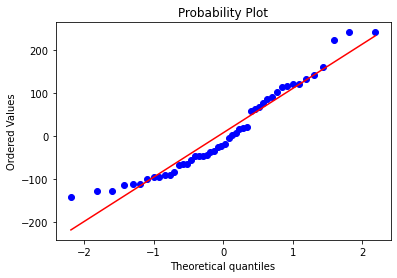

In [153]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()